In [1]:
import qutip as qu
import jax
import numpy as np
import jax.numpy as jnp
from jax import jit
import matplotlib.pyplot as plt

In [2]:
rho = qu.rand_dm(N=2, seed=9)
rho

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.96151202+0.j        0.00221706+0.1884686j]
 [0.00221706-0.1884686j 0.03848798+0.j       ]]

In [3]:
qu.operator_to_vector(rho)

Quantum object: dims = [[[2], [2]], [1]], shape = (4, 1), type = operator-ket
Qobj data =
[[0.96151202+0.j       ]
 [0.00221706-0.1884686j]
 [0.00221706+0.1884686j]
 [0.03848798+0.j       ]]

In [4]:
N = 2 #dimension of Hilbert Space

G = np.array([qu.identity(N), qu.sigmax(), qu.sigmay(), qu.sigmaz()])/np.sqrt(N)

In [5]:
list(G)

[array([[0.70710678+0.j, 0.        +0.j],
        [0.        +0.j, 0.70710678+0.j]]),
 array([[0.        +0.j, 0.70710678+0.j],
        [0.70710678+0.j, 0.        +0.j]]),
 array([[0.+0.j        , 0.-0.70710678j],
        [0.+0.70710678j, 0.+0.j        ]]),
 array([[ 0.70710678+0.j,  0.        +0.j],
        [ 0.        +0.j, -0.70710678+0.j]])]

In [6]:
mat_gg = np.zeros([N**2, N**2, N**2, N**2], dtype=np.complex64)
for i, gi in enumerate(list(G)):
    for j, gj in enumerate(list(G)):
        print(i, j)
        mat_gg[i, j] = np.kron(np.conjugate(gj), gi)

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3


In [7]:
mat_gg[1:, 1:]

array([[[[ 0. +0.j ,  0. +0.j ,  0. +0.j ,  0.5+0.j ],
         [ 0. +0.j ,  0. +0.j ,  0.5+0.j ,  0. +0.j ],
         [ 0. +0.j ,  0.5+0.j ,  0. +0.j ,  0. +0.j ],
         [ 0.5+0.j ,  0. +0.j ,  0. +0.j ,  0. +0.j ]],

        [[ 0. +0.j ,  0. +0.j ,  0. +0.j ,  0. +0.5j],
         [ 0. +0.j ,  0. +0.j ,  0. +0.5j,  0. +0.j ],
         [ 0. +0.j ,  0. -0.5j,  0. +0.j ,  0. +0.j ],
         [ 0. -0.5j,  0. +0.j ,  0. +0.j ,  0. +0.j ]],

        [[ 0. +0.j ,  0.5+0.j ,  0. +0.j ,  0. +0.j ],
         [ 0.5+0.j ,  0. +0.j ,  0. +0.j ,  0. +0.j ],
         [ 0. +0.j ,  0. +0.j ,  0. -0.j , -0.5-0.j ],
         [ 0. +0.j ,  0. +0.j , -0.5-0.j ,  0. -0.j ]]],


       [[[ 0. +0.j ,  0. -0.j ,  0. +0.j ,  0. -0.5j],
         [ 0. +0.j ,  0. +0.j ,  0. +0.5j,  0. +0.j ],
         [ 0. +0.j ,  0. -0.5j,  0. +0.j ,  0. -0.j ],
         [ 0. +0.5j,  0. +0.j ,  0. +0.j ,  0. +0.j ]],

        [[ 0. +0.j ,  0. -0.j ,  0. +0.j ,  0.5+0.j ],
         [ 0. +0.j ,  0. +0.j , -0.5+0.j ,  0. +0.j ],


In [8]:
np.triu_indices(3, k=1)

(array([0, 0, 1]), array([1, 2, 2]))

In [9]:
# # I need to see how I'm going to introduce the particles. There are 5 numbers.

# # particles_vec = [a_r, a_i, b_r, b_i, c]


# def wrap_particles_to_complex(particles):
#     return np.array(
#         [
#             particles[0] + 1j * particles[1],
#             particles[2] + 1j * particles[3],
#             particles[4],
#         ],
#         dtype=np.complex64,
#     )


# def create_dij(particles, **args):
#     dij = np.zeros([N**2 - 1, N**2 - 1], dtype=np.complex64)
#     dij[np.triu_indices(3, k=1)] = [0, particles[0], particles[1]]
#     dij[np.diag_indices(N**2 - 1)] = [0, 0, particles[2]]
#     dij = dij + np.conjugate(dij.T)
#     return dij


# def dij_gg(dij, mat_gg):
#     return np.einsum("ij, ijkl -> kl", dij, mat_gg[1:, 1:])


# def make_H_re(a, b):
#     return np.array([[0, a + 1j * b], [a - 1j * b, 0]])


# def make_liouvillian(H, N=2):
#     return -1j * np.kron(H, np.identity(N)) + 1j * np.kron(np.identity(N), H)

In [10]:
delta = 0.12739334807998307
Omega = 0.5

A = np.array([[1, 0], [0, 0]])
sigmap = np.array([[0, 1], [0, 0]])
sigman = np.array([[0, 0], [1, 0]])


H0 = delta * A + Omega/2 * (sigmap + sigman)




In [11]:
# particles_vec = [1, 2, 3, 4, 5, 6, 7]


# Hre = make_H_re(*particles_vec[0:2])

# H = H0 + Hre 
# dij = create_dij(wrap_particles_to_complex(particles_vec[2:]), N=2)


# dijgg = dij_gg(dij, mat_gg)

# Ltot = make_liouvillian(H) + dijgg






In [12]:
import joblib

true_L = joblib.load("L_num.job")

In [13]:
measurement_ops = []

for i in [qu.sigmax().full(), qu.sigmay().full(), qu.sigmaz().full()]:
    measurement_ops.append((0.5*(np.identity(2) + i),
                            0.5*(np.identity(2) - i)))
    
measurement_ops = jnp.array(measurement_ops)

In [14]:
d = 2
rho0 = rho.full().flatten()

Ez0 = measurement_ops[2, 0].flatten() 

In [15]:
phys_model = {
    "Dim of H space": d,
    "H": H0,
    "True Lindbladian": true_L.full(),
    "Measurement operators": measurement_ops,
    "Initial state": rho0,
    "Identity matrix vectorized": jnp.eye(d).flatten('F'),
    "Identity matrix": jnp.eye(d),
    'Mat_gg': mat_gg
}
model = {
    "Number of parameters": 8,
    "Space boundaries": jnp.array([[-1, 1] for _ in range(8)]),
    "Number of particles": 100,
    "Number of experimental repetitions": 10,
    "physical_model": phys_model,

}

In [16]:
key = jax.random.PRNGKey(seed = 0)

In [17]:
def initialize_weights(model):
    N = model["Number of particles"]
    return jnp.ones(N)/N

In [18]:
def trace_vec(A, phys_model):
    return jnp.dot(A, phys_model["Identity matrix vectorized"])


@jit
def evolve(t, Liouvillian, super_rho, phys_model):
    rho =  jax.scipy.linalg.expm(Liouvillian * t) @ super_rho

    return rho / trace_vec(rho, phys_model)


@jit
def compute_p(rho_vec, E_vec):
    """This should be in vectorized version.

    Args:
        rho_vec (jnp.array): Density matrix of the state
        E_vec (jnp.array): Measurement operator

    Returns:
        Real number: Probability of measure the expected outcome
    """
    p = jnp.clip(jnp.real(jnp.dot(rho_vec, E_vec)), 0.0, 1.0)

    return p


@jit
def generate_data(
    key,
    measurement_op,
    t,
    phys_model,
):
    true_L = phys_model["True Lindbladian"]
    rho0 = phys_model["Initial state"]
    rhot = evolve(t, true_L, rho0, phys_model)
    p = compute_p(rhot, measurement_op)
    key, subkey = jax.random.split(key)
    return key, jax.random.choice(subkey, a=jnp.array([0, 1]), p=jnp.array([1, 1 - p]))


def populate_one_axis(key, bnds, no_particles):
    return jax.random.uniform(
        key, minval=jnp.min(bnds), maxval=jnp.max(bnds), shape=[no_particles]
    )


def initialize_particle_locations(key, model):
    no_of_parameters = model["Number of parameters"]
    boundaries = model["Space boundaries"]
    no_of_particles = model["Number of particles"]
    subkey = jax.random.split(key, no_of_parameters + 1)
    key = subkey[1]
    subkeys = subkey[1:]
    return (
        key,
        jax.vmap(populate_one_axis, in_axes=(0, 0, None))(
            subkeys, boundaries, no_of_particles
        ).T,
    )


@jit
def create_dij(particle, model):
    d = model["Identity matrix"].shape[0]
    dij = jnp.zeros([d**2 - 1, d**2 - 1], dtype=jnp.complex64)

    dij = dij.at[0, 2].set(particle[0] + 1j * particle[1])
    dij = dij.at[1, 2].set(particle[2] + 1j * particle[3])

    dij = dij + jnp.conjugate(dij.T)
    dij = dij.at[2, 2].set(particle[4])
    return dij


@jit
def dij_gg(dij, mat_gg):
    return jnp.einsum("ij, ijkl -> kl", dij, mat_gg[1:, 1:])


@jit
def make_H_renormalization(particles_h):
    return jnp.array(
        [
            [particles_h[0], particles_h[1] + 1j * particles_h[2]],
            [particles_h[1] - 1j * particles_h[2], -particles_h[0]],
        ]
    )


@jit
def make_liouvillian(H, model):
    d = model["Identity matrix"].shape[0]
    return 1j * jnp.kron(H.T, jnp.identity(d)) -1j * jnp.kron(jnp.identity(d), H)


@jit
def generate_liouvillian_particle(particle, model):
    H0 = model["H"]
    mat_gg = model['Mat_gg']
    dissipator = dij_gg(create_dij(particle[0:5], model), mat_gg)
    H_renorm = make_H_renormalization(particle[5:])
    H = H0 + H_renorm
    return make_liouvillian(H, model) + dissipator


@jit
def evolve_particle(particle, t, model):
    rho0 = model["Initial state"]
    L = generate_liouvillian_particle(particle, model)
    return evolve(t, L, rho0, model)


@jit
def p_E0_particle(particle, E_0, t, model):
    return compute_p(evolve_particle(particle, t, model), E_0)


@jit
def p_data_particle(data, particle, E_0, t, model):
    p = p_E0_particle(particle, E_0, t, model)

    return jax.lax.cond(data == 0, lambda : p, lambda : 1 - p)


# vmapped version of everything.
# Given data in an array and particles in an array (particles, positions), gives
# the probability  [particles, prob associated to result]


# jax.vmap(jax.vmap(
#     p_data_particle,
#     in_axes=(0, None, None, None, None),
# ), in_axes=(None, 0, None, None, None))


@jit
def compute_likelihood_data(data, particles, E_0, t, model):
    return jnp.prod(
        jax.vmap(
            jax.vmap(
                p_data_particle,
                in_axes=(0, None, None, None, None),
            ),
            in_axes=(None, 0, None, None, None),
        )(data, particles, E_0, t, model),
        axis=1,
    )


@jit
def update_weights(lkl, weights):
    new_weights = lkl * weights
    new_weights = new_weights / jnp.sum(new_weights)
    return new_weights

@jit
def est_mean(particles_location, weights):
    return jnp.einsum('i, ij -> j', weights, particles_location)


@jit
def est_cov(particles_locations, weights):
    return jnp.einsum(
        "i, im, ik -> mk", weights, particles_locations, particles_locations
    ) - jnp.einsum(
        "i, ij, m, mk -> jk", weights, particles_locations, weights, particles_locations
    )


In [19]:
key, particles_locations = initialize_particle_locations(key, model)
weights = initialize_weights(model)

In [27]:
cov = []

for _ in range(20):
    keys = jax.random.split(key, model["Number of experimental repetitions"] + 1)

    t = 52.9
    key = keys[0]
    _, results = jax.jit(jax.vmap(generate_data, (0, None, None, None)))(
        keys[1:], Ez0, t, model["physical_model"]
    )



    lkl = compute_likelihood_data(results, particles_locations, Ez0, t,  model["physical_model"])

    weights = update_weights(lkl, weights)
    cov.append(est_cov(particles_locations, weights))

# Finding the true values

In [44]:
true_L.full()

array([[ 0.        +0.j        ,  0.        -0.25j      ,
         0.        +0.25j      ,  0.        +0.j        ],
       [-0.00411732-0.24460007j, -0.01134756+0.j        ,
         0.        +0.j        , -0.00122611+0.2448031j ],
       [-0.00411732+0.24460007j,  0.        +0.j        ,
        -0.01134756+0.j        , -0.00122611-0.2448031j ],
       [ 0.        +0.j        ,  0.        +0.25j      ,
         0.        -0.25j      ,  0.        +0.j        ]])

In [43]:
def MSE(Lhat, Ltrue):
    diff = Lhat - Ltrue

    return jnp.mean(jnp.real(diff) ** 2 + jnp.imag(diff) ** 2)

@jit
def fun_to_minimize(particle, Ltrue, model):
    Lhat = generate_liouvillian_particle(particle, model)
    return MSE(Lhat, Ltrue)



In [ ]:
true

In [47]:
fun_to_minimize(particles_locations[0], -jnp.array(true_L), model["physical_model"])

Array(1.1966004, dtype=float32)

In [50]:
from scipy.optimize import minimize

In [52]:
sol['x'] = jnp.ones(6)/100

NameError: name 'sol' is not defined

In [55]:
particles_locations[0]

Array([ 0.6749499 , -0.06530333, -0.57592916,  0.82437754, -0.17221475,
        0.25167823, -0.5858619 , -0.8080182 ], dtype=float32)

In [58]:
sol = minimize(fun_to_minimize, sol['x'], (jnp.array(true_L), model["physical_model"]) , method="Powell")
sol

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.0013121170923113823
       x: [-1.429e-03 -1.037e-04 -1.244e-07  4.161e-07  1.131e-02
           -2.212e-02]
     nit: 2
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]]
    nfev: 222

In [68]:
diff_chi = qu.to_chi(true_L) - qu.to_chi(qu.liouvillian(qu.Qobj(H0)))
C = diff_chi[0, 0] / d + np.sum(
    [diff_chi[i, 0] * G[i] for i in range(1, 4)], axis=0
) / np.sqrt(d)
hre = 0.5 * (1j) * (C - np.conjugate(C.T))
print(qu.Qobj(hre))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-0.06369667+0.j        -0.00264921-0.0007228j]
 [-0.00264921+0.0007228j  0.06369667+0.j       ]]


In [22]:
true_pars_dissipator = (
    np.array([-0.00289121, 0.00020303, -0.01059683, -0.00534343, 0.02269512]) / 2
)
true_pars_hre = 0 * np.array([-0.12739335, -0.00529841, -0.0014456]) / 2

true_pars = np.append(np.array(true_pars_dissipator), np.array(true_pars_hre))
true_pars = jnp.array(true_pars)

In [23]:
print(dij_gg(create_dij(true_pars[0:5], phys_model), mat_gg))

[[ 0.00567378+0.j         -0.00205866+0.00269997j -0.00205866-0.00269997j
   0.        +0.j        ]
 [ 0.00061306-0.00259845j -0.00567378+0.j          0.        +0.j
   0.00205866+0.00269997j]
 [ 0.00061306+0.00259845j  0.        +0.j         -0.00567378+0.j
   0.00205866-0.00269997j]
 [ 0.        +0.j         -0.00061306-0.00259845j -0.00061306+0.00259845j
   0.00567378+0.j        ]]


In [24]:
true_pars

Array([-0.0014456 ,  0.00010151, -0.00529842, -0.00267172,  0.01134756,
       -0.        , -0.        , -0.        ], dtype=float32)

In [25]:
# Check the dij created \
my_dij = create_dij(true_pars[0:5], phys_model)
print(my_dij)

# and the one of the true_L

print(qu.to_chi(true_L)[1:, 1:])

[[ 0.        +0.j          0.        +0.j         -0.0014456 +0.00010151j]
 [ 0.        +0.j          0.        +0.j         -0.00529842-0.00267172j]
 [-0.0014456 -0.00010151j -0.00529842+0.00267172j  0.01134756+0.j        ]]
[[ 0.        +0.j          0.        +0.j         -0.0014456 +0.00010151j]
 [ 0.        +0.j          0.        +0.j         -0.00529841-0.00267172j]
 [-0.0014456 -0.00010151j -0.00529841+0.00267172j  0.01134756+0.j        ]]


In [172]:
qu.to_chi(qu_L(generate_liouvillian_particle(true_pars, phys_model)))

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True, superrep = chi
Qobj data =
[[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+5.00000007e-01j
   7.45058065e-09+0.00000000e+00j  0.00000000e+00+1.27393350e-01j]
 [ 0.00000000e+00-5.00000007e-01j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -1.44560507e-03+1.01514161e-04j]
 [ 7.45058061e-09+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  5.29842824e-03+2.67171522e-03j]
 [ 0.00000000e+00-1.27393350e-01j -1.44560507e-03-1.01514161e-04j
   5.29842824e-03-2.67171522e-03j  1.13475602e-02+0.00000000e+00j]]

In [182]:
qu.to_chi(qu_L(np.einsum('ij, ijkl -> kl', my_dij, mat_gg[1:, 1:])))

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True, superrep = chi
Qobj data =
[[ 0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  -0.00144561+0.00010152j]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.00529842+0.00267172j]
 [ 0.        +0.j         -0.00144561-0.00010152j  0.00529842-0.00267172j
   0.01134756+0.j        ]]

In [191]:
print(np.kron(np.eye(2), rhoex))


[[0.0534347 +0.j         0.11122652+0.18802348j 0.        +0.j
  0.        +0.j        ]
 [0.11122652-0.18802348j 0.9465653 +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.0534347 +0.j
  0.11122652+0.18802348j]
 [0.        +0.j         0.        +0.j         0.11122652-0.18802348j
  0.9465653 +0.j        ]]


In [190]:
qu.spre(rhoex)

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True
Qobj data =
[[0.0534347 +0.j         0.11122652+0.18802348j 0.        +0.j
  0.        +0.j        ]
 [0.11122652-0.18802348j 0.9465653 +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.0534347 +0.j
  0.11122652+0.18802348j]
 [0.        +0.j         0.        +0.j         0.11122652-0.18802348j
  0.9465653 +0.j        ]]

In [193]:
print(np.kron(rhoex.full().T, np.eye(2)))


[[0.0534347 +0.j         0.        +0.j         0.11122652-0.18802348j
  0.        +0.j        ]
 [0.        +0.j         0.0534347 +0.j         0.        +0.j
  0.11122652-0.18802348j]
 [0.11122652+0.18802348j 0.        +0.j         0.9465653 +0.j
  0.        +0.j        ]
 [0.        +0.j         0.11122652+0.18802348j 0.        +0.j
  0.9465653 +0.j        ]]


In [198]:
A = 0
for i in range(3):
    for j in range(3):
        A = A + my_dij[i][j]*np.kron(np.conjugate(G[j+1]), G[i+1])

In [203]:
G

array([[[ 0.70710678+0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        ,  0.70710678+0.j        ]],

       [[ 0.        +0.j        ,  0.70710678+0.j        ],
        [ 0.70710678+0.j        ,  0.        +0.j        ]],

       [[ 0.        +0.j        ,  0.        -0.70710678j],
        [ 0.        +0.70710678j,  0.        +0.j        ]],

       [[ 0.70710678+0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        , -0.70710678+0.j        ]]])

In [199]:
A

Array([[ 0.00567378+0.j        , -0.00205866+0.00269997j,
        -0.00205866-0.00269997j,  0.        +0.j        ],
       [ 0.00061306-0.00259845j, -0.00567378+0.j        ,
         0.        +0.j        ,  0.00205866+0.00269997j],
       [ 0.00061306+0.00259845j,  0.        +0.j        ,
        -0.00567378+0.j        ,  0.00205866-0.00269997j],
       [ 0.        +0.j        , -0.00061306-0.00259845j,
        -0.00061306+0.00259845j,  0.00567378+0.j        ]],      dtype=complex64)

In [202]:
dij_gg(create_dij(true_pars[0:5], phys_model),mat_gg) == A

Array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

In [28]:
A = np.array([-1j*H0, np.eye(2)])
Bd = np.array([np.eye(2), 1j*H0, ])




In [164]:
qu.to_chi(qu.liouvillian(qu.Qobj(H0)))

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True, superrep = chi
Qobj data =
[[0.+0.j         0.+0.5j        0.+0.j         0.+0.12739335j]
 [0.-0.5j        0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.-0.12739335j 0.+0.j         0.+0.j         0.+0.j        ]]

In [131]:
np.round(dij_gg(create_dij(true_pars[0:5], phys_model),mat_gg), 4)

Array([[ 0.0057+0.j    , -0.0021+0.0027j, -0.0021-0.0027j,
         0.    +0.j    ],
       [ 0.0006-0.0026j, -0.0057+0.j    ,  0.    +0.j    ,
         0.0021+0.0027j],
       [ 0.0006+0.0026j,  0.    +0.j    , -0.0057+0.j    ,
         0.0021-0.0027j],
       [ 0.    +0.j    , -0.0006-0.0026j, -0.0006+0.0026j,
         0.0057+0.j    ]], dtype=complex64)

In [204]:
qu.to_chi(qu.liouvillian(qu.Qobj(H0)))

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True, superrep = chi
Qobj data =
[[0.+0.j         0.+0.5j        0.+0.j         0.+0.12739335j]
 [0.-0.5j        0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.-0.12739335j 0.+0.j         0.+0.j         0.+0.j        ]]

In [85]:
print(create_dij(true_pars[0:5], phys_model))

[[ 0.        +0.j          0.        +0.j         -0.0014456 +0.00010151j]
 [ 0.        +0.j          0.        +0.j         -0.00529842-0.00267172j]
 [-0.0014456 -0.00010151j -0.00529842+0.00267172j  0.01134756+0.j        ]]


In [88]:
print(qu.to_chi(true_L)[1:, 1:])

[[ 0.        +0.j          0.        +0.j         -0.0014456 +0.00010151j]
 [ 0.        +0.j          0.        +0.j         -0.00529841-0.00267172j]
 [-0.0014456 -0.00010151j -0.00529841+0.00267172j  0.01134756+0.j        ]]


In [94]:
qu.to_chi(true_L)

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True, superrep = chi
Qobj data =
[[-0.01134756+0.00000000e+00j -0.00267172+4.94701587e-01j
  -0.00010151+1.44560379e-03j  0.        +0.00000000e+00j]
 [-0.00267172-4.94701587e-01j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.0014456 +1.01514161e-04j]
 [-0.00010151-1.44560379e-03j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.00529841-2.67171604e-03j]
 [ 0.        +0.00000000e+00j -0.0014456 -1.01514161e-04j
  -0.00529841+2.67171604e-03j  0.01134756+0.00000000e+00j]]

In [98]:
true_L

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[ 0.        +0.j          0.        -0.25j        0.        +0.25j
   0.        +0.j        ]
 [-0.00411732-0.24460007j -0.01134756+0.j          0.        +0.j
  -0.00122611+0.2448031j ]
 [-0.00411732+0.24460007j  0.        +0.j         -0.01134756+0.j
  -0.00122611-0.2448031j ]
 [ 0.        +0.j          0.        +0.25j        0.        -0.25j
   0.        +0.j        ]]

In [96]:
print(generate_liouvillian_particle(true_pars, phys_model))

[[ 0.00567378+0.j          0.00061306-0.24740155j -0.00205866+0.25269997j
   0.        +0.j        ]
 [-0.00205866-0.25269997j -0.00567378+0.12739335j  0.        +0.j
   0.00205866+0.24730003j]
 [ 0.00061306+0.24740155j  0.        +0.j         -0.00567378-0.12739335j
  -0.00061306-0.25259846j]
 [ 0.        +0.j         -0.00061306+0.25259846j  0.00205866-0.24730003j
   0.00567378+0.j        ]]


In [97]:
qu_L(generate_liouvillian_particle(true_pars, phys_model))

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[ 0.00567378+0.j          0.00061306-0.24740155j -0.00205866+0.25269997j
   0.        +0.j        ]
 [-0.00205866-0.25269997j -0.00567378+0.12739335j  0.        +0.j
   0.00205866+0.24730003j]
 [ 0.00061306+0.24740155j  0.        +0.j         -0.00567378-0.12739335j
  -0.00061306-0.25259846j]
 [ 0.        +0.j         -0.00061306+0.25259846j  0.00205866-0.24730003j
   0.00567378+0.j        ]]

In [111]:
true_pars

Array([ 0.00289121, -0.00020303,  0.01059683,  0.00534343, -0.02269512,
       -0.12739335, -0.00529841, -0.0014456 ], dtype=float32)

In [36]:
def qu_L(L):
    return qu.Qobj(np.array(L), dims=[[[2], [2]], [[2], [2]]], shape=(4, 4))

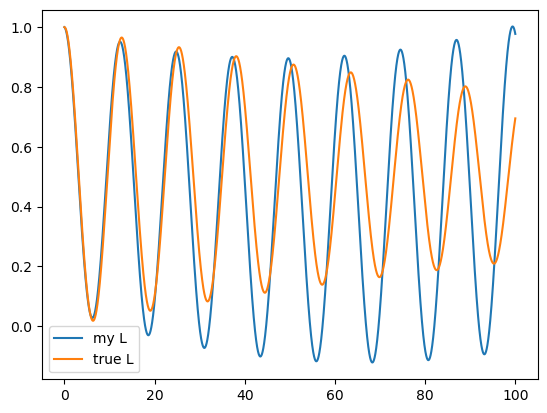

In [128]:
# function to plot something very fast
#input: t, L, rho0


rho0 = np.array(qu.ket2dm(qu.basis(2,0))).flatten()
times = np.linspace(0, 100, 10000)

# L_test = generate_liouvillian_particle(est_mean(particles_locations, weights)
# , model["physical_model"])

L_test =  generate_liouvillian_particle(true_pars, phys_model)


rhot = (rho0@jax.scipy.linalg.expm(jnp.einsum("i, mk-> imk", times, L_test)))

plt.plot(times, rhot[:, 0], label='my L')
# plt.plot(times, rhot[:, 3])
# plt.plot(times, rhot[:, 3]+ rhot[:, 0])



L_test =  jnp.array(true_L.full())
rhot = (rho0@jax.scipy.linalg.expm(jnp.einsum("i, mk-> imk", times, L_test)))

plt.plot(times, rhot[:, 0], label='true L')
plt.legend()
plt.show()

In [155]:
sol['x']

array([-1.38279740e-03, -4.59182615e-05,  6.85131853e-06,  4.39778646e-06,
        1.13537222e-02, -4.97348960e-01, -2.09459291e-05])

In [130]:
Ltrue = true_L.full()
Lhat = generate_liouvillian_particle(particles_locations[0], model["physical_model"])


In [192]:
generate_liouvillian_particle(0*sol['x'], model["physical_model"])

Array([[0.+0.j        , 0.+0.25j      , 0.-0.25j      , 0.+0.j        ],
       [0.+0.25j      , 0.-0.12739335j, 0.+0.j        , 0.-0.25j      ],
       [0.-0.25j      , 0.+0.j        , 0.+0.12739335j, 0.+0.25j      ],
       [0.+0.j        , 0.-0.25j      , 0.+0.25j      , 0.+0.j        ]],      dtype=complex64)

In [190]:
qu.liouvillian(qu.Qobj(H0)).full()

array([[0.+0.j        , 0.-0.25j      , 0.+0.25j      , 0.+0.j        ],
       [0.-0.25j      , 0.+0.12739335j, 0.+0.j        , 0.+0.25j      ],
       [0.+0.25j      , 0.+0.j        , 0.-0.12739335j, 0.-0.25j      ],
       [0.+0.j        , 0.+0.25j      , 0.-0.25j      , 0.+0.j        ]])

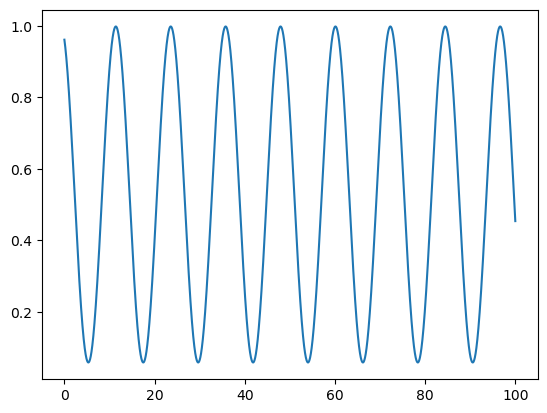

In [28]:
# function to plot something very fast
#input: t, L, rho0

times = np.linspace(0, 100, 10000)

# L_test = generate_liouvillian_particle(est_mean(particles_locations, weights)
# , model["physical_model"])

L_test = generate_liouvillian_particle(0*particles_locations[0], model["physical_model"])

rhot = (rho0@jax.scipy.linalg.expm(jnp.einsum("i, mk-> imk", times, L_test)))

plt.plot(times, rhot[:, 0])
# plt.plot(times, rhot[:, 3])
# plt.plot(times, rhot[:, 3]+ rhot[:, 0])

plt.show()




In [29]:
rho0

array([0.96151202+0.j       , 0.00221706+0.1884686j,
       0.00221706-0.1884686j, 0.03848798+0.j       ])

In [34]:
def qu_L(L):
    return qu.Qobj(np.array(L), dims=[[[2], [2]], [[2], [2]]], shape=(4, 4))

In [40]:
qu.liouvillian(qu.Qobj(H0))

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[0.+0.j         0.-0.25j       0.+0.25j       0.+0.j        ]
 [0.-0.25j       0.+0.12739335j 0.+0.j         0.+0.25j      ]
 [0.+0.25j       0.+0.j         0.-0.12739335j 0.-0.25j      ]
 [0.+0.j         0.+0.25j       0.-0.25j       0.+0.j        ]]

In [43]:
qu.operator_to_vector(qu.ket2dm(qu.basis(2, 0)))

Quantum object: dims = [[[2], [2]], [1]], shape = (4, 1), type = operator-ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

In [42]:
qu.Qobj(rho0)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.96151202+0.j       ]
 [0.00221706+0.1884686j]
 [0.00221706-0.1884686j]
 [0.03848798+0.j       ]]

In [45]:
qu.to_chi(true_L)

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True, superrep = chi
Qobj data =
[[-0.02269512+0.00000000e+00j -0.00534343+9.89403173e-01j
  -0.00020303+2.89120758e-03j  0.        +0.00000000e+00j]
 [-0.00534343-9.89403173e-01j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.00289121+2.03028321e-04j]
 [-0.00020303-2.89120758e-03j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.01059683-5.34343207e-03j]
 [ 0.        +0.00000000e+00j -0.00289121-2.03028321e-04j
  -0.01059683+5.34343207e-03j  0.02269512+0.00000000e+00j]]

In [106]:
diff_chi = qu.to_chi(true_L) - qu.to_chi(qu.liouvillian(qu.Qobj(H0)))
C = diff_chi[0,0]/d + np.sum([diff_chi[i, 0]*G[i] for i in range(1, 4)], axis=0)/np.sqrt(d)
hre = 0.5*(1j)*(C - np.conjugate(C.T))
qu.Qobj(hre)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-0.12739335+0.j        -0.00529841-0.0014456j]
 [-0.00529841+0.0014456j  0.12739335+0.j       ]]

In [112]:
print(hre)

[[-0.12739335+0.j        -0.00529841-0.0014456j]
 [-0.00529841+0.0014456j  0.12739335+0.j       ]]


In [111]:
print(H0)

[[0.12739335 0.25      ]
 [0.25       0.        ]]


In [120]:
print(-make_liouvillian(jnp.array(hre+H0), phys_model))

[[-0.       -0.j         -0.0014456-0.2447016j   0.0014456+0.2447016j
  -0.       -0.j        ]
 [ 0.0014456-0.2447016j  -0.       -0.12739335j -0.       -0.j
   0.0014456+0.2447016j ]
 [-0.0014456+0.2447016j  -0.       -0.j         -0.       +0.12739335j
  -0.0014456-0.2447016j ]
 [-0.       -0.j         -0.0014456+0.2447016j   0.0014456-0.2447016j
  -0.       -0.j        ]]


In [118]:
qu.liouvillian(qu.Qobj(hre+H0))

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[ 0.       +0.j         -0.0014456-0.24470159j -0.0014456+0.24470159j
   0.       +0.j        ]
 [ 0.0014456-0.24470159j  0.       -0.12739335j  0.       +0.j
  -0.0014456+0.24470159j]
 [ 0.0014456+0.24470159j  0.       +0.j          0.       +0.12739335j
  -0.0014456-0.24470159j]
 [ 0.       +0.j          0.0014456+0.24470159j  0.0014456-0.24470159j
   0.       +0.j        ]]

In [115]:
qu.to_chi(true_L)

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True, superrep = chi
Qobj data =
[[-0.02269512+0.00000000e+00j -0.00534343+9.89403173e-01j
  -0.00020303+2.89120758e-03j  0.        +0.00000000e+00j]
 [-0.00534343-9.89403173e-01j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.00289121+2.03028321e-04j]
 [-0.00020303-2.89120758e-03j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.01059683-5.34343207e-03j]
 [ 0.        +0.00000000e+00j -0.00289121-2.03028321e-04j
  -0.01059683+5.34343207e-03j  0.02269512+0.00000000e+00j]]

In [114]:
qu.to_chi(qu.liouvillian(qu.Qobj(hre + H0)))

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True, superrep = chi
Qobj data =
[[0.+0.j         0.+0.97880635j 0.-0.00578242j 0.-0.2547867j ]
 [0.-0.97880635j 0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.00578242j 0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.2547867j  0.+0.j         0.+0.j         0.+0.j        ]]

In [109]:
create_dij(true_pars_dissipator, phys_model)

Array([[ 0.        +0.j        ,  0.        +0.j        ,
        -0.0014456 +0.00010151j],
       [ 0.        +0.j        ,  0.        +0.j        ,
        -0.00529842-0.00267172j],
       [-0.0014456 -0.00010151j, -0.00529842+0.00267172j,
         0.01134756+0.j        ]], dtype=complex64)

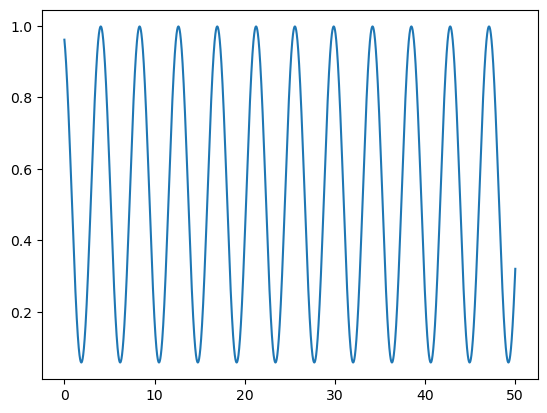

In [87]:
# function to plot something very fast
#input: t, L, rho0

times = np.linspace(0, 50, 10000)

# L_test = generate_liouvillian_particle(est_mean(particles_locations, weights)
# , model["physical_model"])

L_test = jnp.array(-qu.liouvillian(qu.Qobj(hre)))

rhot = (rho0@jax.scipy.linalg.expm(jnp.einsum("i, mk-> imk", times, L_test)))

plt.plot(times, rhot[:, 0])
# plt.plot(times, rhot[:, 3])
# plt.plot(times, rhot[:, 3]+ rhot[:, 0])

plt.show()


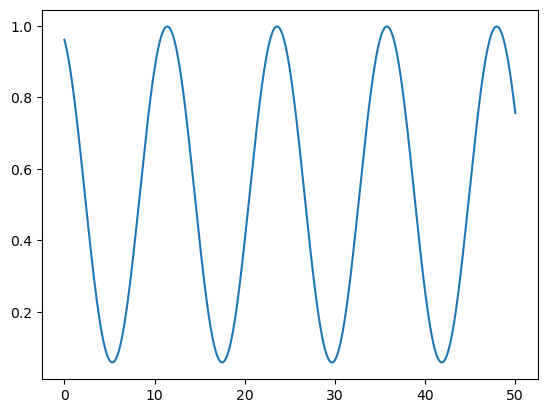

In [88]:
# function to plot something very fast
#input: t, L, rho0

times = np.linspace(0, 50, 10000)

# L_test = generate_liouvillian_particle(est_mean(particles_locations, weights)
# , model["physical_model"])

L_test = jnp.array(-qu.liouvillian(qu.Qobj(H0)))

rhot = (rho0@jax.scipy.linalg.expm(jnp.einsum("i, mk-> imk", times, L_test)))

plt.plot(times, rhot[:, 0])
# plt.plot(times, rhot[:, 3])
# plt.plot(times, rhot[:, 3]+ rhot[:, 0])

plt.show()

In [74]:
qu.liouvillian(qu.Qobj(H0 - hre))

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[ 0.        +0.j          0.00204439-0.25749309j  0.00204439+0.25749309j
   0.        +0.j        ]
 [-0.00204439-0.25749309j  0.        +0.48771615j  0.        +0.j
   0.00204439+0.25749309j]
 [-0.00204439+0.25749309j  0.        +0.j          0.        -0.48771615j
   0.00204439-0.25749309j]
 [ 0.        +0.j         -0.00204439+0.25749309j -0.00204439-0.25749309j
   0.        +0.j        ]]

In [47]:
qu.to_chi(qu_L(L_test))

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True, superrep = chi
Qobj data =
[[0.+0.j        0.-1.j        0.+0.j        0.-0.2547867j]
 [0.+1.j        0.+0.j        0.+0.j        0.+0.j       ]
 [0.+0.j        0.+0.j        0.+0.j        0.+0.j       ]
 [0.+0.2547867j 0.+0.j        0.+0.j        0.+0.j       ]]

In [32]:
qu.Qobj(np.array(L_test), dims= [[[2], [2]], [[2], [2]]], shape=(4, 4))

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[0.+0.j         0.+0.25j       0.-0.25j       0.+0.j        ]
 [0.+0.25j       0.-0.12739335j 0.+0.j         0.-0.25j      ]
 [0.-0.25j       0.+0.j         0.+0.12739335j 0.+0.25j      ]
 [0.+0.j         0.-0.25j       0.+0.25j       0.+0.j        ]]

In [30]:
true_L

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[ 0.        +0.j          0.        -0.25j        0.        +0.25j
   0.        +0.j        ]
 [-0.00411732-0.24460007j -0.01134756+0.j          0.        +0.j
  -0.00122611+0.2448031j ]
 [-0.00411732+0.24460007j  0.        +0.j         -0.01134756+0.j
  -0.00122611-0.2448031j ]
 [ 0.        +0.j          0.        +0.25j        0.        -0.25j
   0.        +0.j        ]]

In [200]:
L_test.shape

(4, 4)

In [206]:
(rho0@jnp.einsum("i, mk-> imk", times, L_test)).shape

(1000, 4)

In [107]:
jnp.array(cov)

(20, 7, 7)

In [119]:
jnp.apply_along_axis(jnp.linalg.norm, 0, jnp.array(cov)).shape

(7, 7)

In [113]:
jnp.linalg.norm(jnp.array(cov), axis=2).shape

(20, 7)

In [96]:
plt.plot()

NameError: name 'diag' is not defined

In [59]:
Est_Mean(particles_locations, weights)

Array([ 0.5506206 ,  0.44855314,  0.00657567,  0.1656428 ,  0.21674466,
        0.11676057, -0.1716336 ], dtype=float32)

In [60]:
weights.shape

(100,)

In [83]:
jnp.einsum("i, ij, m, mk -> jk", weights, particles_locations, weights, particles_locations)

Array([[ 3.0318314e-01,  2.4698265e-01,  3.6206993e-03,  9.1206335e-02,
         1.1934409e-01,  6.4290784e-02, -9.4505005e-02],
       [ 2.4698265e-01,  2.0119995e-01,  2.9495372e-03,  7.4299589e-02,
         9.7221509e-02,  5.2373327e-02, -7.6986790e-02],
       [ 3.6206993e-03,  2.9495372e-03,  4.3239426e-05,  1.0892120e-03,
         1.4252412e-03,  7.6777890e-04, -1.1286057e-03],
       [ 9.1206335e-02,  7.4299589e-02,  1.0892120e-03,  2.7437527e-02,
         3.5902187e-02,  1.9340545e-02, -2.8429862e-02],
       [ 1.1934409e-01,  9.7221509e-02,  1.4252412e-03,  3.5902187e-02,
         4.6978246e-02,  2.5307231e-02, -3.7200663e-02],
       [ 6.4290784e-02,  5.2373327e-02,  7.6777890e-04,  1.9340545e-02,
         2.5307231e-02,  1.3633031e-02, -2.0040035e-02],
       [-9.4505005e-02, -7.6986790e-02, -1.1286057e-03, -2.8429862e-02,
        -3.7200663e-02, -2.0040035e-02,  2.9458089e-02]], dtype=float32)

In [92]:
est_cov(particles_locations, weights)

(7, 7)

In [90]:
@jit
def est_cov(particles_locations, weights):
    return jnp.einsum(
        "i, im, ik -> mk", weights, particles_locations, particles_locations
    ) - jnp.einsum(
        "i, ij, m, mk -> jk", weights, particles_locations, weights, particles_locations
    )

In [87]:
mu_col = Est_Mean(particles_locations, weights)[:, jnp.newaxis]
np.isclose( (mu_col @ mu_col.T),   jnp.einsum("i, ij, m, mk -> jk", weights, particles_locations, weights, particles_locations))

array([[ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True]])

In [69]:
weights[jnp.newaxis]@

Array([0.29599017], dtype=float32)

In [46]:
import matplotlib.pyplot as plt

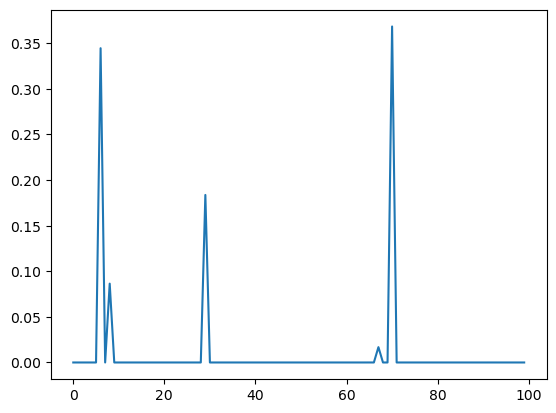

In [51]:
plt.plot(weights)

In [ ]:
jax.tree_util.tree_flatten_with_path(model)

# Steps

The model somehow should be independent from the algorithm, such that is easy to adapt to other situations.
The steps are:
- Generate particles
- Generate experiments. Gather data.
- Compute the likelihood of the experiments given the particles.
- Update the probability distribution
- Resample if necessary
- Check conditions to stop


In the end, we are gonna work with a set of particle locations and its associated weights. This should be the thing.

In [369]:
# Now in jax
# def wrap_particles_to_complex(particles):
#     return np.array(
#         [
#             particles[0] + 1j * particles[1],
#             particles[2] + 1j * particles[3],
#             particles[4],
#         ],
#         dtype=np.complex64,
#     )


# def create_dij(particles, **args):
#     dij = np.zeros([N**2 - 1, N**2 - 1], dtype=np.complex64)
#     dij[np.triu_indices(3, k=1)] = [0, particles[0], particles[1]]
#     dij[np.diag_indices(N**2 - 1)] = [0, 0, particles[2]]
#     dij = dij + np.conjugate(dij.T)
#     return dij


# def dij_gg(dij, mat_gg):
#     return np.einsum("ij, ijkl -> kl", dij, mat_gg[1:, 1:])


# def make_H_re(a, b):
#     return np.array([[0, a + 1j * b], [a - 1j * b, 0]])


# def make_liouvillian(H, N=2):
#     return -1j * np.kron(H, np.identity(N)) + 1j * np.kron(np.identity(N), H)

In [598]:
lkl = compute_likelihood_data(results, particles_example, measurement_ops[3][0].flatten(), 0.4, phys_model)

In [601]:
(weights*lkl)

(100,)

In [562]:
particles_example.shape

(7, 100)

In [584]:

re = jax.vmap(jax.vmap(
    p_data_particle,
    in_axes=(0, None, None, None, None),
), in_axes=(None, 0, None, None, None))(jnp.array([0, 1, 1, 0]), particles_example[0:15], measurement_ops[3][0].flatten(), 2.4, phys_model)

In [588]:
jnp.prod(re, axis=1).shape

(15,)

# We will rewrite it trying to imitate qutip

In [7]:
rhoex = qu.rand_dm(2, 0.9)

In [8]:
rhoex

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.0534347 +0.j         0.11122652+0.18802348j]
 [0.11122652-0.18802348j 0.9465653 +0.j        ]]

In [9]:
qu.operator_to_vector(qu.ket2dm(qu.basis(2, 0)))

Quantum object: dims = [[[2], [2]], [1]], shape = (4, 1), type = operator-ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

In [22]:
rhoex

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.0534347 +0.j         0.11122652+0.18802348j]
 [0.11122652-0.18802348j 0.9465653 +0.j        ]]

In [23]:
rhoex.full().flatten(order='F')

array([0.0534347 +0.j        , 0.11122652-0.18802348j,
       0.11122652+0.18802348j, 0.9465653 +0.j        ])

In [24]:
qu.liouvillian(qu.Qobj(H0)).full() @ qu.operator_to_vector(rhoex).full()

array([[-0.09401174+0.j        ],
       [ 0.02395294+0.23745217j],
       [ 0.02395294-0.23745217j],
       [ 0.09401174+0.j        ]])

In [25]:
qu.operator_to_vector(rhoex)

Quantum object: dims = [[[2], [2]], [1]], shape = (4, 1), type = operator-ket
Qobj data =
[[0.0534347 +0.j        ]
 [0.11122652-0.18802348j]
 [0.11122652+0.18802348j]
 [0.9465653 +0.j        ]]

In [26]:
rhoex.full().flatten(order='F') @ qu.liouvillian(qu.Qobj(H0)).full()

array([-0.09401174+0.j        ,  0.02395294+0.23745217j,
        0.02395294-0.23745217j,  0.09401174+0.j        ])

In [27]:
qu.liouvillian(qu.Qobj(H0)).full() @ rhoex.full().flatten(order='F')

array([-0.09401174+0.j        ,  0.02395294+0.23745217j,
        0.02395294-0.23745217j,  0.09401174+0.j        ])

In [28]:
rhoex.full().flatten('F')

array([0.0534347 +0.j        , 0.11122652-0.18802348j,
       0.11122652+0.18802348j, 0.9465653 +0.j        ])

In [34]:
compute_p(rhoex.full().flatten('F'), measurement_ops[2, 0].flatten('F'))

Array(0.0534347, dtype=float32)

In [35]:
measurement_ops[2, 0]

Array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]], dtype=complex64)

In [29]:
qu.liouvillian(qu.Qobj(H0))

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[0.+0.j         0.-0.25j       0.+0.25j       0.+0.j        ]
 [0.-0.25j       0.+0.12739335j 0.+0.j         0.+0.25j      ]
 [0.+0.25j       0.+0.j         0.-0.12739335j 0.-0.25j      ]
 [0.+0.j         0.+0.25j       0.-0.25j       0.+0.j        ]]

In [30]:
A = np.array([-1j*H0, np.identity(d)])
Bdag =  np.array([np.identity(2), 1j*H0])

In [31]:
aux = np.zeros([4, 4], dtype=np.complex64)
for i in range(4):
    for j in range(4):
        aux[i,j] = np.trace(G[i]@A[0])*np.trace(G[j]@Bdag[0]) + np.trace(G[i]@A[1])*np.trace(G[j]@Bdag[1])
 


In [32]:
G

array([[[ 0.70710678+0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        ,  0.70710678+0.j        ]],

       [[ 0.        +0.j        ,  0.70710678+0.j        ],
        [ 0.70710678+0.j        ,  0.        +0.j        ]],

       [[ 0.        +0.j        ,  0.        -0.70710678j],
        [ 0.        +0.70710678j,  0.        +0.j        ]],

       [[ 0.70710678+0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        , -0.70710678+0.j        ]]])

In [33]:
qu.to_chi(qu.liouvillian(qu.Qobj(H0)))

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True, superrep = chi
Qobj data =
[[0.+0.j         0.+0.5j        0.+0.j         0.+0.12739335j]
 [0.-0.5j        0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.-0.12739335j 0.+0.j         0.+0.j         0.+0.j        ]]

In [38]:
qu.to_chi(true_L)

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True, superrep = chi
Qobj data =
[[-0.01134756+0.00000000e+00j -0.00267172+4.94701587e-01j
  -0.00010151+1.44560379e-03j  0.        +0.00000000e+00j]
 [-0.00267172-4.94701587e-01j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.0014456 +1.01514161e-04j]
 [-0.00010151-1.44560379e-03j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.00529841-2.67171604e-03j]
 [ 0.        +0.00000000e+00j -0.0014456 -1.01514161e-04j
  -0.00529841+2.67171604e-03j  0.01134756+0.00000000e+00j]]

In [35]:
true_L

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[ 0.        +0.j          0.        -0.25j        0.        +0.25j
   0.        +0.j        ]
 [-0.00411732-0.24460007j -0.01134756+0.j          0.        +0.j
  -0.00122611+0.2448031j ]
 [-0.00411732+0.24460007j  0.        +0.j         -0.01134756+0.j
  -0.00122611-0.2448031j ]
 [ 0.        +0.j          0.        +0.25j        0.        -0.25j
   0.        +0.j        ]]

In [36]:
make_liouvillian(H0, phys_model)

Array([[0.+0.j        , 0.-0.25j      , 0.+0.25j      , 0.+0.j        ],
       [0.-0.25j      , 0.+0.12739335j, 0.+0.j        , 0.+0.25j      ],
       [0.+0.25j      , 0.+0.j        , 0.-0.12739335j, 0.-0.25j      ],
       [0.+0.j        , 0.+0.25j      , 0.-0.25j      , 0.+0.j        ]],      dtype=complex64)

# CHECKING HOW QUTIP CONSTRUCTS THE FUCKING SUPEROPERATORS

We have someting in the $d_{ij}$ representation

In [26]:
my_dij

Array([[ 0.        +0.j        ,  0.        +0.j        ,
        -0.0014456 +0.00010151j],
       [ 0.        +0.j        ,  0.        +0.j        ,
        -0.00529842-0.00267172j],
       [-0.0014456 -0.00010151j, -0.00529842+0.00267172j,
         0.01134756+0.j        ]], dtype=complex64)

I can write that into superoperators, in the following way. $d_{ij} G_i \rho G_j \rightarrow d_{ij} (G_j^* \otimes G_i) \vec{\rho}$

In [29]:
A

array([[[0.-0.12739335j, 0.-0.25j      ],
        [0.-0.25j      , 0.-0.j        ]],

       [[1.+0.j        , 0.+0.j        ],
        [0.+0.j        , 1.+0.j        ]]])

In [30]:
mat_gg[2, 3]

array([[ 0.+0.j ,  0.-0.5j,  0.+0.j ,  0.-0.j ],
       [ 0.+0.5j,  0.+0.j ,  0.+0.j ,  0.+0.j ],
       [ 0.+0.j ,  0.-0.j ,  0.-0.j , -0.+0.5j],
       [ 0.+0.j ,  0.+0.j ,  0.-0.5j,  0.-0.j ]], dtype=complex64)

In [32]:
# Im gonna create the xij for -i[H, rho]

Aux = np.zeros([4, 4], dtype=np.complex64)
for i in range(4):
    for j in range(4):
        for k in range(2):
            Aux[i,j] = Aux[i,j] + np.trace(G[i]@A[k])*np.trace(G[j]@Bd[k])

In [33]:
print(np.round(Aux, 4))

[[0.-0.j     0.+0.5j    0.+0.j     0.+0.1274j]
 [0.-0.5j    0.+0.j     0.+0.j     0.+0.j    ]
 [0.+0.j     0.+0.j     0.+0.j     0.+0.j    ]
 [0.-0.1274j 0.+0.j     0.+0.j     0.+0.j    ]]


In [34]:
mat_gg.shape

(4, 4, 4, 4)

In [37]:
#Now I write it in superoperator.

qu_L(np.einsum("ijkl, ij -> kl", mat_gg, Aux))

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[0.+0.j         0.-0.25j       0.+0.25j       0.+0.j        ]
 [0.-0.25j       0.+0.12739335j 0.+0.j         0.+0.25j      ]
 [0.+0.25j       0.+0.j         0.-0.12739335j 0.-0.25j      ]
 [0.+0.j         0.+0.25j       0.-0.25j       0.+0.j        ]]

In [38]:
qu.liouvillian(qu.Qobj(H0))

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[0.+0.j         0.-0.25j       0.+0.25j       0.+0.j        ]
 [0.-0.25j       0.+0.12739335j 0.+0.j         0.+0.25j      ]
 [0.+0.25j       0.+0.j         0.-0.12739335j 0.-0.25j      ]
 [0.+0.j         0.+0.25j       0.-0.25j       0.+0.j        ]]

For now, they are the same, let's write it in the chi

In [39]:
qu.to_chi(qu.liouvillian(qu.Qobj(H0)))

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True, superrep = chi
Qobj data =
[[0.+0.j         0.+0.5j        0.+0.j         0.+0.12739335j]
 [0.-0.5j        0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.-0.12739335j 0.+0.j         0.+0.j         0.+0.j        ]]

In [40]:
qu.to_chi(qu_L(np.einsum("ijkl, ij -> kl", mat_gg, Aux)))

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True, superrep = chi
Qobj data =
[[0.+0.j         0.+0.5j        0.+0.j         0.+0.12739335j]
 [0.-0.5j        0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.-0.12739335j 0.+0.j         0.+0.j         0.+0.j        ]]

## Now with dissipative part

In [41]:
# the dij for the true_L is

qu.to_chi(true_L)[1:, 1:]

array([[ 0.        +0.j        ,  0.        +0.j        ,
        -0.0014456 +0.00010151j],
       [ 0.        +0.j        ,  0.        +0.j        ,
        -0.00529841-0.00267172j],
       [-0.0014456 -0.00010151j, -0.00529841+0.00267172j,
         0.01134756+0.j        ]])

In [44]:
print(my_dij)

np.isclose(my_dij, qu.to_chi(true_L)[1:, 1:])

[[ 0.        +0.j          0.        +0.j         -0.0014456 +0.00010151j]
 [ 0.        +0.j          0.        +0.j         -0.00529842-0.00267172j]
 [-0.0014456 -0.00010151j -0.00529842+0.00267172j  0.01134756+0.j        ]]


array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [80]:
# They are the same. Let's create the superop version of my_dij


mat_gg = np.zeros([N**2, N**2, N**2, N**2], dtype=np.complex64)
for i, gi in enumerate(list(G)):
    for j, gj in enumerate(list(G)):
        # print(i, j)
        mat_gg[i, j] = np.kron(np.conjugate(gj), gi)
        # mat_gg[i, j] = np.kron(gi, gj)



aux = np.zeros([4, 4], dtype=np.complex64)

aux[1:, 1:] = my_dij
aux[0, :] = qu.to_chi(true_L)[0, :]
aux[1:, 0] = qu.to_chi(true_L)[1:, 0]


aux


qu.Qobj(
    np.einsum("ijkl, ij -> kl", mat_gg, aux),
    dims=[[[2], [2]], [[2], [2]]],
    shape=(4, 4),
    superrep="chi",
)

uf = qu.Qobj(aux, dims=[[[2], [2]], [[2], [2]]], shape=(4, 4), superrep="chi")
uf
# qu.to_super(uf)

ValueError: could not broadcast input array from shape (3,1) into shape (3,)

In [83]:
qu.to_chi(true_L)[1:, 0]

array([[-0.00267172-0.49470159j],
       [-0.00010151-0.0014456j ],
       [ 0.        +0.j        ]])

In [77]:
dijsuper = qu.Qobj(
    np.einsum("ijkl, ij -> kl", mat_gg, aux),
    dims=[[[2], [2]], [[2], [2]]],
    shape=(4, 4),
    superrep="super",
)

qu.to_chi(dijsuper)

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True, superrep = chi
Qobj data =
[[ 0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  -0.00144561+0.00010152j]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.00529842+0.00267172j]
 [ 0.        +0.j         -0.00144561-0.00010152j  0.00529842-0.00267172j
   0.01134756+0.j        ]]

In [79]:
qu.to_chi(true_L)

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True, superrep = chi
Qobj data =
[[-0.01134756+0.00000000e+00j -0.00267172+4.94701587e-01j
  -0.00010151+1.44560379e-03j  0.        +0.00000000e+00j]
 [-0.00267172-4.94701587e-01j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.0014456 +1.01514161e-04j]
 [-0.00010151-1.44560379e-03j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.00529841-2.67171604e-03j]
 [ 0.        +0.00000000e+00j -0.0014456 -1.01514161e-04j
  -0.00529841+2.67171604e-03j  0.01134756+0.00000000e+00j]]

In [60]:
qu.to_super(qu.to_chi(true_L))

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[ 0.        +0.j          0.        -0.0625j      0.        +0.0625j
   0.        +0.j        ]
 [-0.00102933-0.06115002j -0.00283689+0.j          0.        +0.j
  -0.00030653+0.06120078j]
 [-0.00102933+0.06115002j  0.        +0.j         -0.00283689+0.j
  -0.00030653-0.06120078j]
 [ 0.        +0.j          0.        +0.0625j      0.        -0.0625j
   0.        +0.j        ]]

In [50]:
aux = np.zeros([4, 4], dtype=np.complex64)

aux[1:, 1:] = my_dij
aux

array([[ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , -0.0014456 +0.00010151j],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , -0.00529842-0.00267172j],
       [ 0.        +0.j        , -0.0014456 -0.00010151j,
        -0.00529842+0.00267172j,  0.01134756+0.j        ]],
      dtype=complex64)